In [1]:
import numpy as np
import pandas as pd

In [2]:
df1=pd.read_csv("avila-tr.txt",header=None)
df2=pd.read_csv("avila-ts.txt",header=None)
ds= pd.concat([df1, df2], axis=0)
print(ds.head())
print(len(ds))
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
le = LabelEncoder()
ds[10] = le.fit_transform(ds[10])
ds

         0         1         2         3         4         5         6   \
0  0.266074 -0.165620  0.320980  0.483299  0.172340  0.273364  0.371178   
1  0.130292  0.870736 -3.210528  0.062493  0.261718  1.436060  1.465940   
2 -0.116585  0.069915  0.068476 -0.783147  0.261718  0.439463 -0.081827   
3  0.031541  0.297600 -3.210528 -0.583590 -0.721442 -0.307984  0.710932   
4  0.229043  0.807926 -0.052442  0.082634  0.261718  0.148790  0.635431   

         7         8         9  10  
0  0.929823  0.251173  0.159345  A  
1  0.636203  0.282354  0.515587  A  
2 -0.888236 -0.123005  0.582939  A  
3  1.051693  0.594169 -0.533994  A  
4  0.051062  0.032902 -0.086652  F  
20867


,0,1,2,3,4,5,6,7,8,9,10
0,0.266074,-0.165620,0.320980,0.483299,0.172340,0.273364,0.371178,0.929823,0.251173,0.159345,0
1,0.130292,0.870736,-3.210528,0.062493,0.261718,1.436060,1.465940,0.636203,0.282354,0.515587,0
2,-0.116585,0.069915,0.068476,-0.783147,0.261718,0.439463,-0.081827,-0.888236,-0.123005,0.582939,0
3,0.031541,0.297600,-3.210528,-0.583590,-0.721442,-0.307984,0.710932,1.051693,0.594169,-0.533994,0
4,0.229043,0.807926,-0.052442,0.082634,0.261718,0.148790,0.635431,0.051062,0.032902,-0.086652,5
...,...,...,...,...,...,...,...,...,...,...,...
10432,-0.128929,-0.040001,0.057807,0.557894,0.261718,-0.930856,-0.044076,1.158458,2.277968,-0.699884,10
10433,0.266074,0.556689,-0.020434,0.176624,0.261718,-0.515608,0.597681,0.178349,0.625350,-0.657245,6
10434,-0.054866,0.580242,0.032912,-0.016668,0.261718,1.519109,0.371178,-0.985508,-0.403638,1.276301,0
10435,0.080916,0.588093,0.015130,0.002250,0.261718,-0.930856,-0.270579,0.163807,-0.091823,-0.593329,5


In [3]:
samples = np.array_split(ds, 10)

In [4]:
for i in range(10):
    print(len(samples[i]))

2087
2087
2087
2087
2087
2087
2087
2086
2086
2086


In [5]:
print(samples[5].head())

         0         1         2         3         4         5         6   \
5  0.068573 -0.181323 -3.210528 -0.294311 -1.168333  0.356414 -0.006326   
6 -0.301743 -0.314793  0.399221  0.770520  0.708609  0.564038 -1.403091   
7  0.031541 -0.118513  0.374326 -0.066706  0.261718  0.605563  0.559930   
8 -0.091897 -0.118513  0.189393  1.280303  0.261718  0.314889  0.069175   
9  0.377169  0.014957  0.381439  0.292753  0.261718 -0.307984  0.522180   

         7         8         9   10  
5 -0.219550  0.126447  0.448186   5  
6 -1.459107 -0.091823  1.627420  11  
7 -0.258129  0.095265  0.344766   0  
8  1.277183  0.531806  0.359002   0  
9  0.370989  0.562987 -0.440132   7  


In [6]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import random
from sklearn.svm import *

In [7]:
t_sample=[]
t_accuracy=[]
t_kernel=[]
t_c=[]
t_gamma=[]

In [8]:
klist=['linear','poly','rbf','sigmoid']
for i in range(10):
    t_sample.append(f"s{i+1}")
    y=samples[i][10]
    x=samples[i].drop(10,axis=1)
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)
    s_accuracy=0
    s_c=0
    s_gamma=0
    s_kernel=""
    iteration=1000
    for j in range(iteration):
        c_temp = random.randint(1, 100)/100
        gamma_temp= random.randint(1, 100)/100
        kernel_n=random.randint(0, 3)
        model = SVC(kernel=klist[kernel_n],C=c_temp,gamma=gamma_temp)
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)
        accuracy = accuracy_score(y_test, y_pred)
        if accuracy>s_accuracy:
            s_accuracy=accuracy
            s_c=c_temp
            s_gamma=gamma_temp
            s_kernel=klist[kernel_n]
    t_accuracy.append(s_accuracy)
    t_kernel.append(s_kernel)
    t_c.append(s_c)
    t_gamma.append(s_gamma)

        
    

In [9]:
print(t_accuracy)

[0.6539074960127592, 0.6570972886762361, 0.6427432216905901, 0.6810207336523126, 0.6411483253588517, 0.6523125996810207, 0.6730462519936204, 0.6182108626198083, 0.6261980830670927, 0.5990415335463258]


In [10]:
print(t_kernel)

['rbf', 'rbf', 'rbf', 'rbf', 'rbf', 'poly', 'rbf', 'rbf', 'rbf', 'rbf']


In [11]:
print(t_c)

[1.0, 0.96, 0.99, 0.95, 1.0, 0.87, 0.98, 0.97, 0.97, 1.0]


In [12]:
print(t_gamma)

[0.33, 0.41, 0.38, 0.49, 0.44, 0.94, 0.37, 0.51, 0.23, 0.32]


In [13]:
summary={'Sample':t_sample,'Accuracy':t_accuracy,'Kernel':t_kernel,'C':t_c,'Gamma':t_gamma}
table= pd.DataFrame(summary)

In [14]:
table

,Sample,Accuracy,Kernel,C,Gamma
0,s1,0.653907,rbf,1.00,0.33
1,s2,0.657097,rbf,0.96,0.41
2,s3,0.642743,rbf,0.99,0.38
3,s4,0.681021,rbf,0.95,0.49
4,s5,0.641148,rbf,1.00,0.44
5,s6,0.652313,poly,0.87,0.94
6,s7,0.673046,rbf,0.98,0.37
7,s8,0.618211,rbf,0.97,0.51
8,s9,0.626198,rbf,0.97,0.23
9,s10,0.599042,rbf,1.00,0.32


In [15]:
table.to_csv('summary.csv', index=False)

In [16]:
iterations=[]
y_accuracy=[]
max_acc=0
for i in range(10):
    if table["Accuracy"][i]==max(table["Accuracy"]):
        y=samples[i][10]
        x=samples[i].drop(10,axis=1)
        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)
        print(f'{table["Sample"][i]} has maximum accuracy')
        for j in range(iteration):
            c_temp = random.randint(1, 100)/100
            gamma_temp= random.randint(1, 100)/100
            kernel_n=random.randint(0, 3)
            model = SVC(kernel=klist[kernel_n],C=c_temp,gamma=gamma_temp)
            model.fit(x_train, y_train)
            y_pred = model.predict(x_test)
            accuracy = accuracy_score(y_test, y_pred)
            max_acc=max(accuracy,max_acc)
            iterations.append(j+1)
            y_accuracy.append(max_acc)
                

            

        

s4 has maximum accuracy


In [19]:
import matplotlib.pyplot as plt



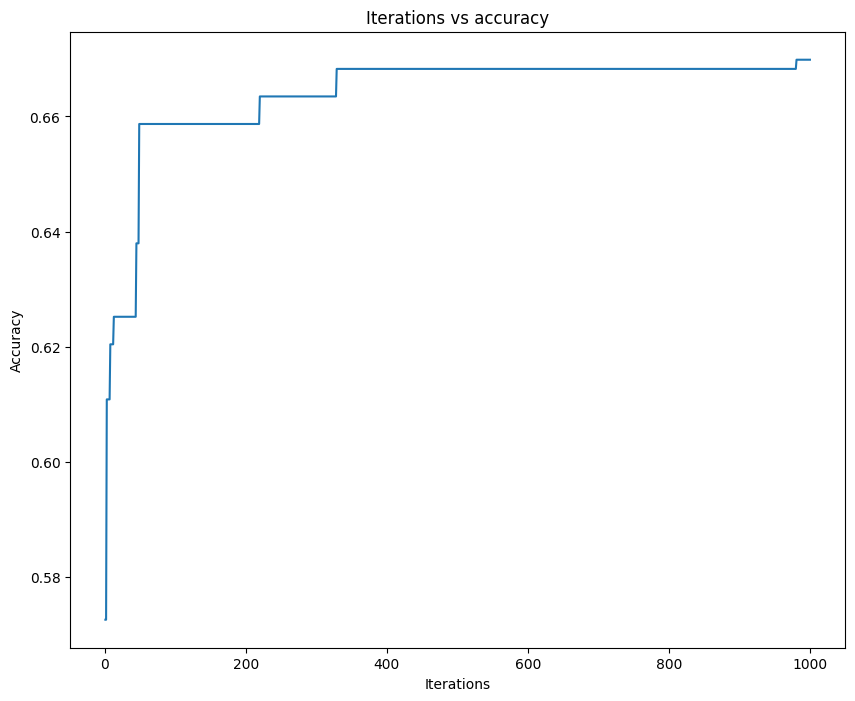

In [20]:
plt.figure(figsize=(10, 8))
plt.plot(iterations, y_accuracy)
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.title('Iterations vs accuracy')
plt.savefig('iter_vs_acc.jpeg')
plt.show()